In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV

from sklearn import linear_model
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance

In [3]:
data = pd.read_csv('../data/dfLongterm.csv')

In [4]:
data.head()

,fea1,fea2,fea3,fea4,fea5,fea6,fea7,fea8,fea9,fea10,...,fea24,fea25,fea26,fea27,fea28,fea29,fea30,fea31,fea32,fea33
0,137.14,-210.30,70.38,-1.80,13.52,7.67,9.21,-4.23,3.85,-2.07,...,0.33,0.34,0.41,0.43,0.20,0.17,0.26,0.54,0.42,0.45
1,96.00,-321.79,105.26,16.30,33.23,11.20,28.95,12.95,16.30,2.92,...,0.55,0.59,0.41,0.38,0.27,0.22,0.09,0.05,0.12,0.25
2,174.55,-216.06,88.31,-8.95,41.89,18.97,7.79,-2.24,5.94,0.00,...,0.25,0.21,0.44,0.21,0.09,0.18,0.31,0.67,0.40,0.53
3,49.23,-185.45,85.01,-8.47,3.75,-17.62,6.10,-14.41,-8.74,-7.15,...,0.24,0.50,0.53,0.20,0.26,0.09,0.14,0.17,0.31,0.33
4,120.00,-209.14,69.00,30.20,31.84,14.17,22.39,5.16,12.23,0.63,...,0.03,0.06,0.12,0.22,0.23,0.18,0.17,0.17,0.43,0.82


In [5]:
y = pd.read_csv('../data/dfY.csv')

In [11]:
df = pd.concat([data,y['valence_mean'], y['arousal_mean']], axis=1)

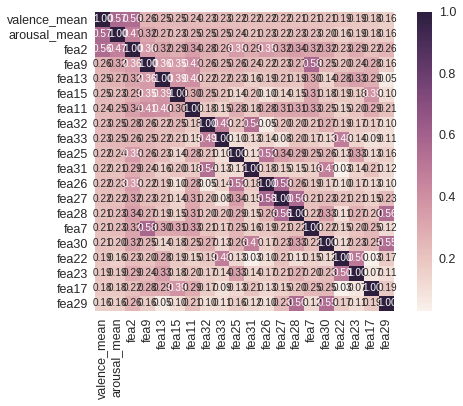

In [14]:
k = 20 #number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(k, 'valence_mean')['valence_mean'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
#plt.savefig('heatmap.png')

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
data_scaled = scaler.transform(data)

In [11]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [13]:
data_scaled

,fea1,fea2,fea3,fea4,fea5,fea6,fea7,fea8,fea9,fea10,...,fea24,fea25,fea26,fea27,fea28,fea29,fea30,fea31,fea32,fea33
0,0.655190,-0.076289,-0.775442,-0.034227,-0.765004,0.625078,0.209074,-0.232969,0.167046,0.303801,...,-0.094536,0.119726,0.342517,0.607786,-0.716554,-0.999566,-0.435367,0.917389,0.368432,0.424233
1,-0.697601,-1.237927,0.141235,0.678357,0.547352,0.926323,1.939007,1.843453,1.536770,0.989698,...,1.096746,1.603536,0.342517,0.318272,-0.294819,-0.719813,-1.472541,-1.818019,-1.379786,-0.709320
2,1.885329,-0.136304,-0.304226,-0.315718,1.123963,1.589404,0.084631,0.007548,0.396984,0.588331,...,-0.527729,-0.651855,0.509935,-0.666075,-1.379279,-0.943615,-0.130315,1.643110,0.251884,0.877655
3,-2.235521,0.182628,-0.390953,-0.296821,-1.415522,-1.533136,-0.063474,-1.463352,-1.218080,-0.394467,...,-0.581878,1.069364,1.012190,-0.723977,-0.355067,-1.447171,-1.167490,-1.148123,-0.272581,-0.255899
4,0.091582,-0.064203,-0.811710,1.225590,0.454802,1.179779,1.364115,0.901932,1.088996,0.674927,...,-1.719011,-1.542141,-1.275859,-0.608172,-0.535810,-0.943615,-0.984459,-1.148123,0.426706,2.521308
5,1.406887,-0.949523,0.190117,1.468499,-0.838911,1.067132,0.641119,-0.195502,0.599417,0.846745,...,-0.094536,0.535193,1.960893,0.144564,-0.656306,-0.551961,0.113726,0.414967,1.242541,1.387754
6,-0.697601,-1.294399,0.010619,0.259074,-0.006620,0.351994,-0.516551,1.268146,0.341975,-0.479689,...,-0.419431,-0.948617,-0.661993,-0.723977,-0.234572,0.231347,0.418777,1.754759,-0.039485,-0.595965
7,-1.749845,0.248999,-0.780961,0.857487,-0.284272,0.342607,-0.225600,-0.455357,-0.462257,-0.839819,...,-1.664862,-1.542141,-0.550380,0.723592,-0.897297,-0.999566,-1.350520,-1.594721,-1.612881,-0.539287
8,-0.984666,-0.550884,-0.748898,0.705915,0.153845,-0.532968,0.469353,-0.106063,0.316670,-0.838445,...,-1.556563,-1.660846,-1.554890,-1.013491,-1.017792,-0.496011,-0.862438,-0.869000,0.251884,0.650944
9,-0.346743,0.394138,-0.802774,0.061046,0.089260,0.148888,0.542967,0.557473,0.736939,-0.624016,...,-0.365282,-1.364084,-0.661993,0.202467,1.813851,2.301520,-0.191326,-0.869000,0.018789,-0.425932


In [7]:
def modelTest(clf, train, labels):
    cv = KFold(n_splits=5,shuffle=True,random_state=45).split(train)
    mse = make_scorer(mean_squared_error)
    mse_val_score = cross_val_score(clf, train, labels, cv=cv, scoring=mse)
    scores=[mse_val_score.mean()]
    return scores

In [8]:
def modelPlot(result_dict):
    result = pd.DataFrame.from_dict(result_dict, orient='index')
    result.columns = ["Mean Squared Error"] 
    result = result.sort(columns=["Mean Squared Error"],ascending=False)
    #print(result)
    result.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    return result

In [9]:
def modelFit(train, labels):
    result_dict = {}
    '''
    clf = linear_model.LinearRegression()
    result_dict["Linear"] = modelTest(clf, train, labels)
    
    clf = linear_model.Lasso(alpha=1e-4)
    result_dict["Lasso"] = modelTest(clf, train, labels)
    
    clf = linear_model.Ridge()
    result_dict["Ridge"] = modelTest(clf, train, labels)
    
    clf = linear_model.BayesianRidge()
    result_dict["Bayesian Ridge"] = modelTest(clf, train, labels)
    
    clf = linear_model.HuberRegressor()
    result_dict["Huber"] = modelTest(clf, train, labels)
    
    clf = svm.SVR()
    result_dict["SVM RBF"] = modelTest(clf, train, labels)
    
    clf = svm.SVR(kernel="linear")
    result_dict["SVM Linear"] = modelTest(clf, train, labels)
    
    clf = BaggingRegressor()
    result_dict["Bagging"] = modelTest(clf, train, labels)
    
    clf = RandomForestRegressor()
    result_dict["RandomForest"] = modelTest(clf, train, labels)
    '''
    clf = AdaBoostRegressor()
    result_dict["AdaBoost"] = modelTest(clf, train, labels)
    
    clf = XGBRegressor()
    result_dict["XGBoost"] = modelTest(clf, train, labels)
    
    model_summary = modelPlot(result_dict)
    return model_summary

,Mean Squared Error
AdaBoost,0.901820
XGBoost,0.880615


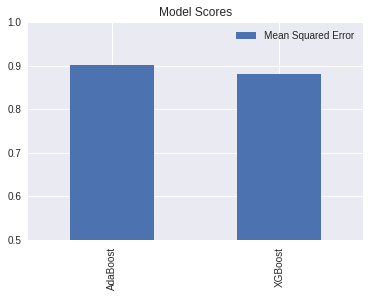

In [10]:
#modelFit(data_scaled, y['valence_mean'])
modelFit(data, y['valence_mean'])

# Run best model 

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
def create_model(model, data, y):
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=7)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    sns.regplot(x=y_pred, y=y_test)
    print(np.corrcoef(y_pred, y_test))
    print(mean_squared_error(y_test, y_pred))

In [8]:
clf_valence = XGBRegressor()

[[ 1.          0.61843629]
 [ 0.61843629  1.        ]]
0.828713435051


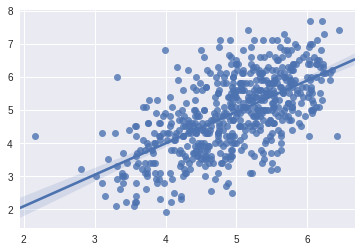

In [9]:
create_model(clf_valence, data.as_matrix(), np.array(y['valence_mean']))

[[ 1.          0.59095564]
 [ 0.59095564  1.        ]]
1.0859522334


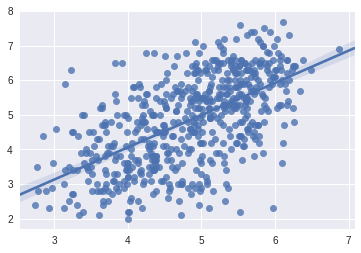

In [10]:
clf_arousal = XGBRegressor()
create_model(clf_arousal, data.as_matrix(), np.array(y['arousal_mean']))

## Reference about correlation metric to evaluate model
http://imgur.com/a/gX89A

https://classroom.udacity.com/courses/ud501/lessons/4802891095/concepts/49196894850923

## Check important features

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 30, 20

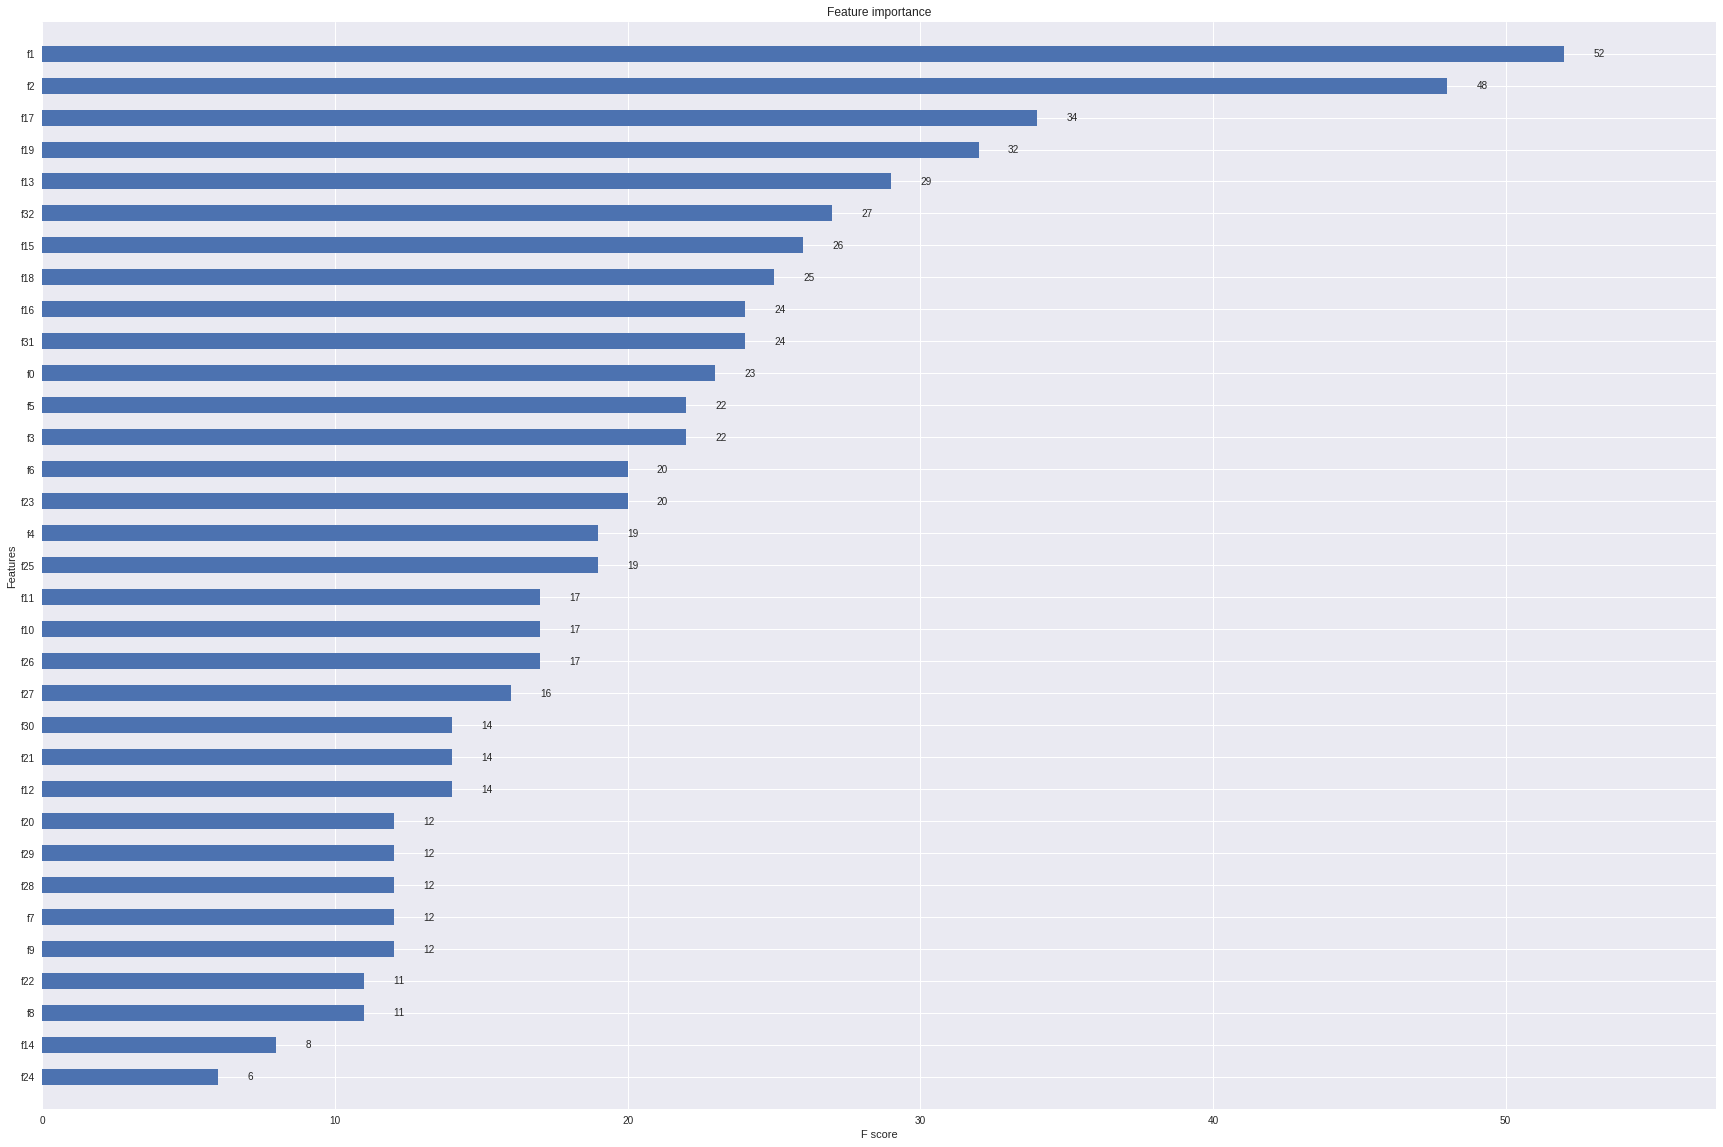

In [12]:
plot_importance(clf_valence, height=0.5)
plt.savefig('feas_importance.png')
plt.show()

In [38]:
clf_valence.booster().get_fscore()

{'f0': 23,
 'f1': 52,
 'f10': 17,
 'f11': 17,
 'f12': 14,
 'f13': 29,
 'f14': 8,
 'f15': 26,
 'f16': 24,
 'f17': 34,
 'f18': 25,
 'f19': 32,
 'f2': 48,
 'f20': 12,
 'f21': 14,
 'f22': 11,
 'f23': 20,
 'f24': 6,
 'f25': 19,
 'f26': 17,
 'f27': 16,
 'f28': 12,
 'f29': 12,
 'f3': 22,
 'f30': 14,
 'f31': 24,
 'f32': 27,
 'f4': 19,
 'f5': 22,
 'f6': 20,
 'f7': 12,
 'f8': 11,
 'f9': 12}

# Remove feature and re-run model

In [39]:
data_removed = data.copy()

In [46]:
del data_removed['fea13']
del data_removed['fea22']

[[ 1.          0.61337517]
 [ 0.61337517  1.        ]]
0.835887229053


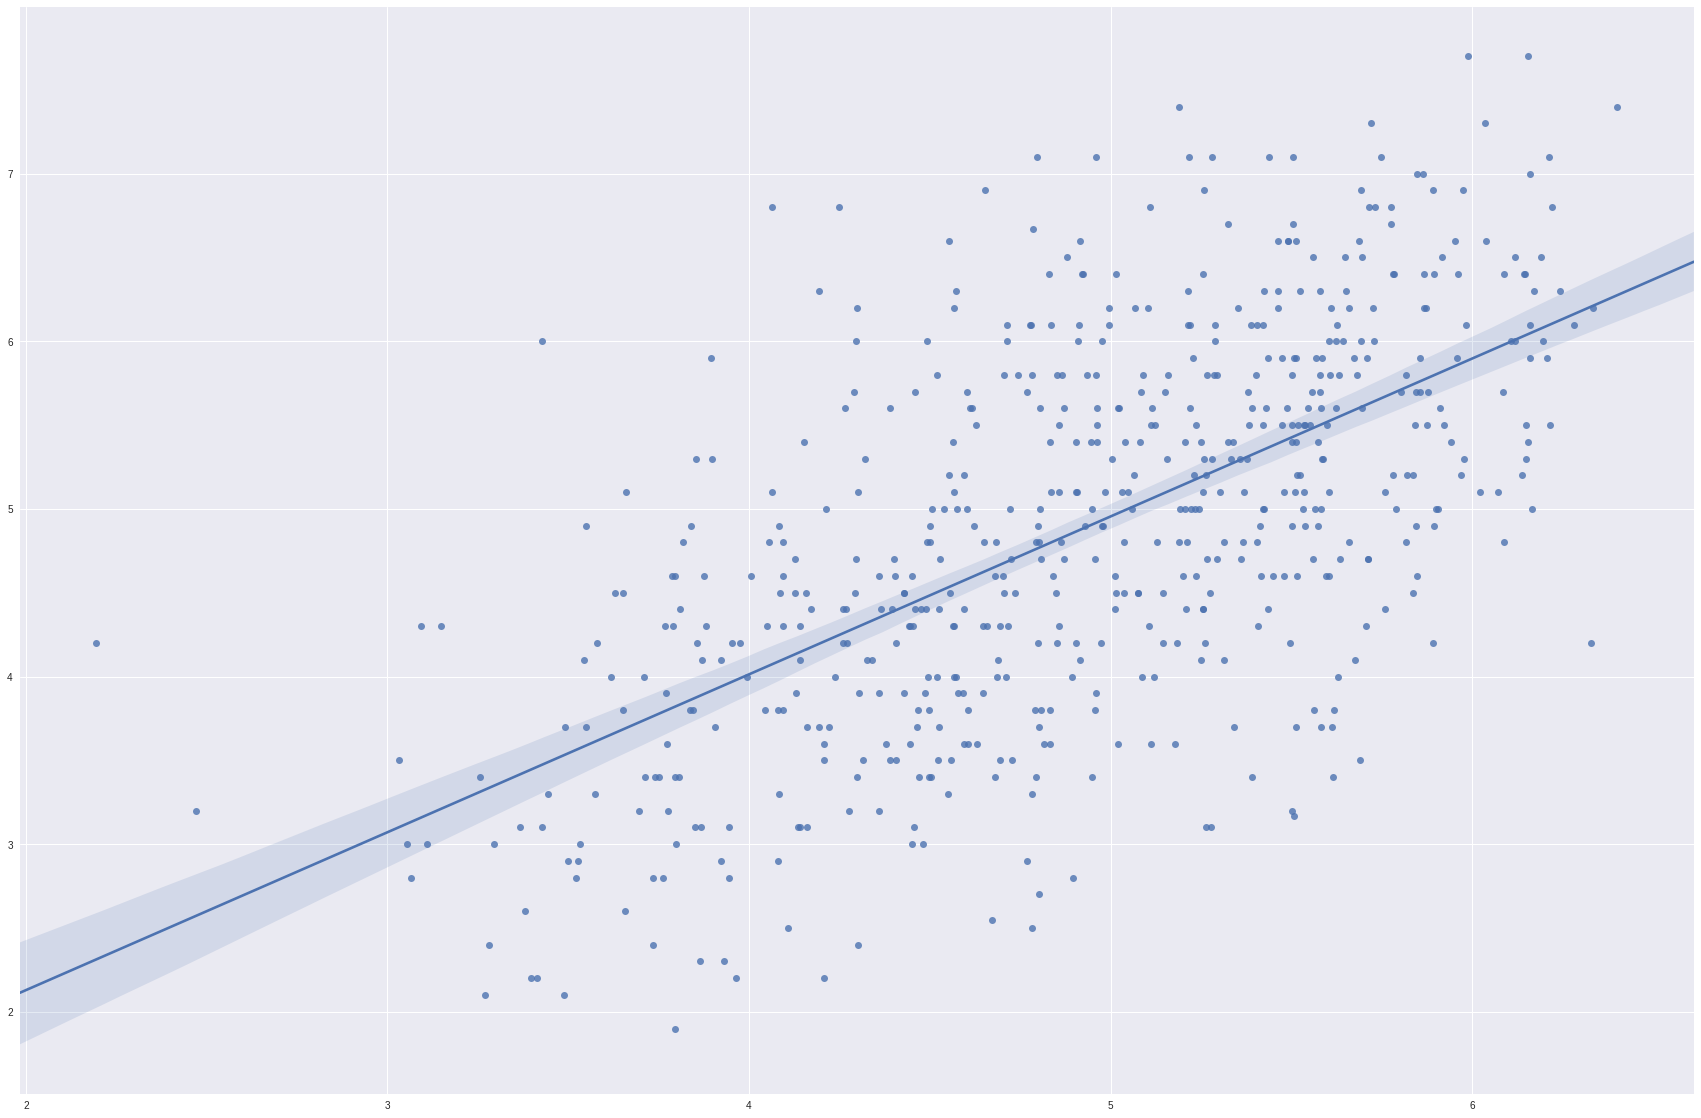

In [47]:
clf_valence_removed = XGBRegressor()
create_model(clf_valence_removed, data_removed.as_matrix(), np.array(y['valence_mean']))

In [48]:
clf_valence_removed.booster().get_fscore()

{'f0': 28,
 'f1': 58,
 'f10': 12,
 'f11': 15,
 'f12': 12,
 'f13': 25,
 'f14': 19,
 'f15': 40,
 'f16': 26,
 'f17': 34,
 'f18': 18,
 'f19': 22,
 'f2': 50,
 'f20': 15,
 'f21': 20,
 'f22': 15,
 'f23': 18,
 'f24': 16,
 'f25': 11,
 'f26': 18,
 'f27': 20,
 'f28': 31,
 'f3': 34,
 'f4': 25,
 'f5': 23,
 'f6': 21,
 'f7': 13,
 'f8': 21,
 'f9': 14}

# Experiment with different model and show error rate

In [ ]:
clf_arousal_ridge = linear_model.Ridge()
create_model(clf_arousal_ridge, data_scaled, np.array(y['arousal_mean']))

In [40]:
df_compare_arousal = pd.DataFrame({"arousal_target": y_test['arousal_mean'], "arousal_pred": y_pred_arousal})

In [42]:
df_compare_arousal['ErrorRate']= df_compare_arousal.apply(lambda row: abs(row['arousal_pred']-row['arousal_target'])/row['arousal_target'], axis=1)
df_compare_arousal.describe()

,arousal_pred,arousal_target,ErrorRate
count,595.000000,595.000000,595.000000
mean,4.829609,4.834353,0.198640
std,0.818259,1.291042,0.202932
min,2.746579,2.000000,0.000112
25%,4.226549,3.800000,0.063272
50%,4.920983,4.900000,0.150523
75%,5.480211,5.800000,0.249885
max,6.869541,7.700000,1.595567


In [26]:
df_compare = pd.DataFrame({"valence_target": y_test['valence_mean'], "valence_pred": y_pred})

In [27]:
df_compare.head()

,valence_pred,valence_target
1554,2.455784,4.6
1666,2.336570,6.4
649,1.844455,4.5
37,2.247237,5.8
1286,2.380033,6.1


In [28]:
df_compare['ErrorRate']= df_compare.apply(lambda row: abs(row['valence_pred']-row['valence_target'])/row['valence_target'], axis=1)

In [29]:
df_compare['ErrorRate'].describe()

count    595.000000
mean       0.527808
std        0.103227
min        0.016969
25%        0.476123
50%        0.545702
75%        0.598228
max        0.729439
Name: ErrorRate, dtype: float64

In [43]:
clfRandom = RandomForestRegressor()
clfRandom.fit(X_train, y_train['valence_mean'])
y_pred_valence_RandomF = clfRandom.predict(X_test)
mean_squared_error(y_test['valence_mean'], y_pred_valence_RandomF)

0.92713670924369751

In [27]:
import pickle

In [47]:
def save_model(model, fileName):
    f = open('./'+fileName, 'wb')
    pickle.dump(model, f)

In [66]:
save_model(clf_valence, "valence_model.sav")
save_model(clf_arousal, "arousal_model.sav")

# Fine Tune

In [49]:
feature = [ 0.65519038, -0.07628927, -0.77544214, -0.03422748, -0.76500356,
        0.62507754,  0.2090739 , -0.23296932,  0.16704597,  0.30380077,
       -0.12093146,  0.84937125,  0.6236305 , -0.73196571,  1.23342518,
        0.64840883, -0.29515861,  0.66941854,  0.67054655,  0.07763418,
        0.35497932,  0.65683281, -0.80359708, -0.09453569,  0.11972583,
        0.34251675,  0.6077862 , -0.7165535 , -0.99956607, -0.43536672,
        0.91738949,  0.36843219,  0.42423349]

In [62]:
feature2= data.loc[2,:]

In [70]:
np.array(feature2)

array([  1.74550000e+02,  -2.16060000e+02,   8.83100000e+01,
        -8.95000000e+00,   4.18900000e+01,   1.89700000e+01,
         7.79000000e+00,  -2.24000000e+00,   5.94000000e+00,
         0.00000000e+00,   5.36000000e+00,   2.07000000e+00,
         2.31000000e+00,  -6.30000000e+00,   4.57000000e+00,
         8.40000000e-01,   4.87000000e+00,  -9.80000000e+00,
        -3.50000000e+00,  -7.39000000e+00,   9.04000000e+00,
         3.60000000e-01,   1.50000000e-01,   2.50000000e-01,
         2.10000000e-01,   4.40000000e-01,   2.10000000e-01,
         9.00000000e-02,   1.80000000e-01,   3.10000000e-01,
         6.70000000e-01,   4.00000000e-01,   5.30000000e-01])

In [63]:
y.loc[2,:]

index           2.0
song_id         4.0
valence_mean    5.7
arousal_mean    5.5
Name: 2, dtype: float64

In [67]:
model = pickle.load(open('./valence_model.sav', 'rb'))

In [68]:
model.predict(feature2)

array([ 5.01894236], dtype=float32)

In [ ]:
# Create k-fold
#kf = KFold(n_splits=5, shuffle=True, random_state=7).split(X_train)
#scorer = make_scorer(mean_squared_error, greater_is_better=True)

In [13]:
def paraSearch(model, data, y, parameters):
    scorer = make_scorer(mean_squared_error, greater_is_better=True)
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=7)
    gs = GridSearchCV(model, parameters, cv=5, scoring=scorer)
    gs.fit(X_train, y_train)
    return gs.best_params_, gs.best_score_, gs.best_estimator_

In [14]:
#XGBRegressor
xgb_params = {
    'colsample_bytree': [0.5, 0.7, 0.9],
    'subsample': [0.5, 0.6, 0.7],
    'learning_rate': [0.075, 0.05, 0.03, 0.01, 0.1, 0.5],
    'max_depth': [1, 3, 5, 7, 9, 11, 13],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 150, 200],
    'reg_alpha': [0, 0.1, 0.3, 0.5, 0.7, 1],
    'reg_lambda': [0.1, 0.5, 0.7, 1],
}

In [15]:
paraSearch(clf_valence, data, y['valence_mean'], xgb_params)

({'colsample_bytree': 0.7,
  'learning_rate': 0.01,
  'max_depth': 13,
  'min_child_weight': 1,
  'n_estimators': 50,
  'reg_alpha': 0,
  'reg_lambda': 0.5,
  'subsample': 0.5},
 8.4837638608433714,
 XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.7,
        gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=13,
        min_child_weight=1, missing=None, n_estimators=50, nthread=-1,
        objective='reg:linear', reg_alpha=0, reg_lambda=0.5,
        scale_pos_weight=1, seed=0, silent=True, subsample=0.5))

In [49]:
clf_valence

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [53]:
clf_finetune =  XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.7,
        gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=13,
        min_child_weight=1, missing=None, n_estimators=50, nthread=-1,
        objective='reg:linear', reg_alpha=0, reg_lambda=0.5,
        scale_pos_weight=1, seed=0, silent=True, subsample=0.5)

[[ 1.          0.58420734]
 [ 0.58420734  1.        ]]
8.44792407013


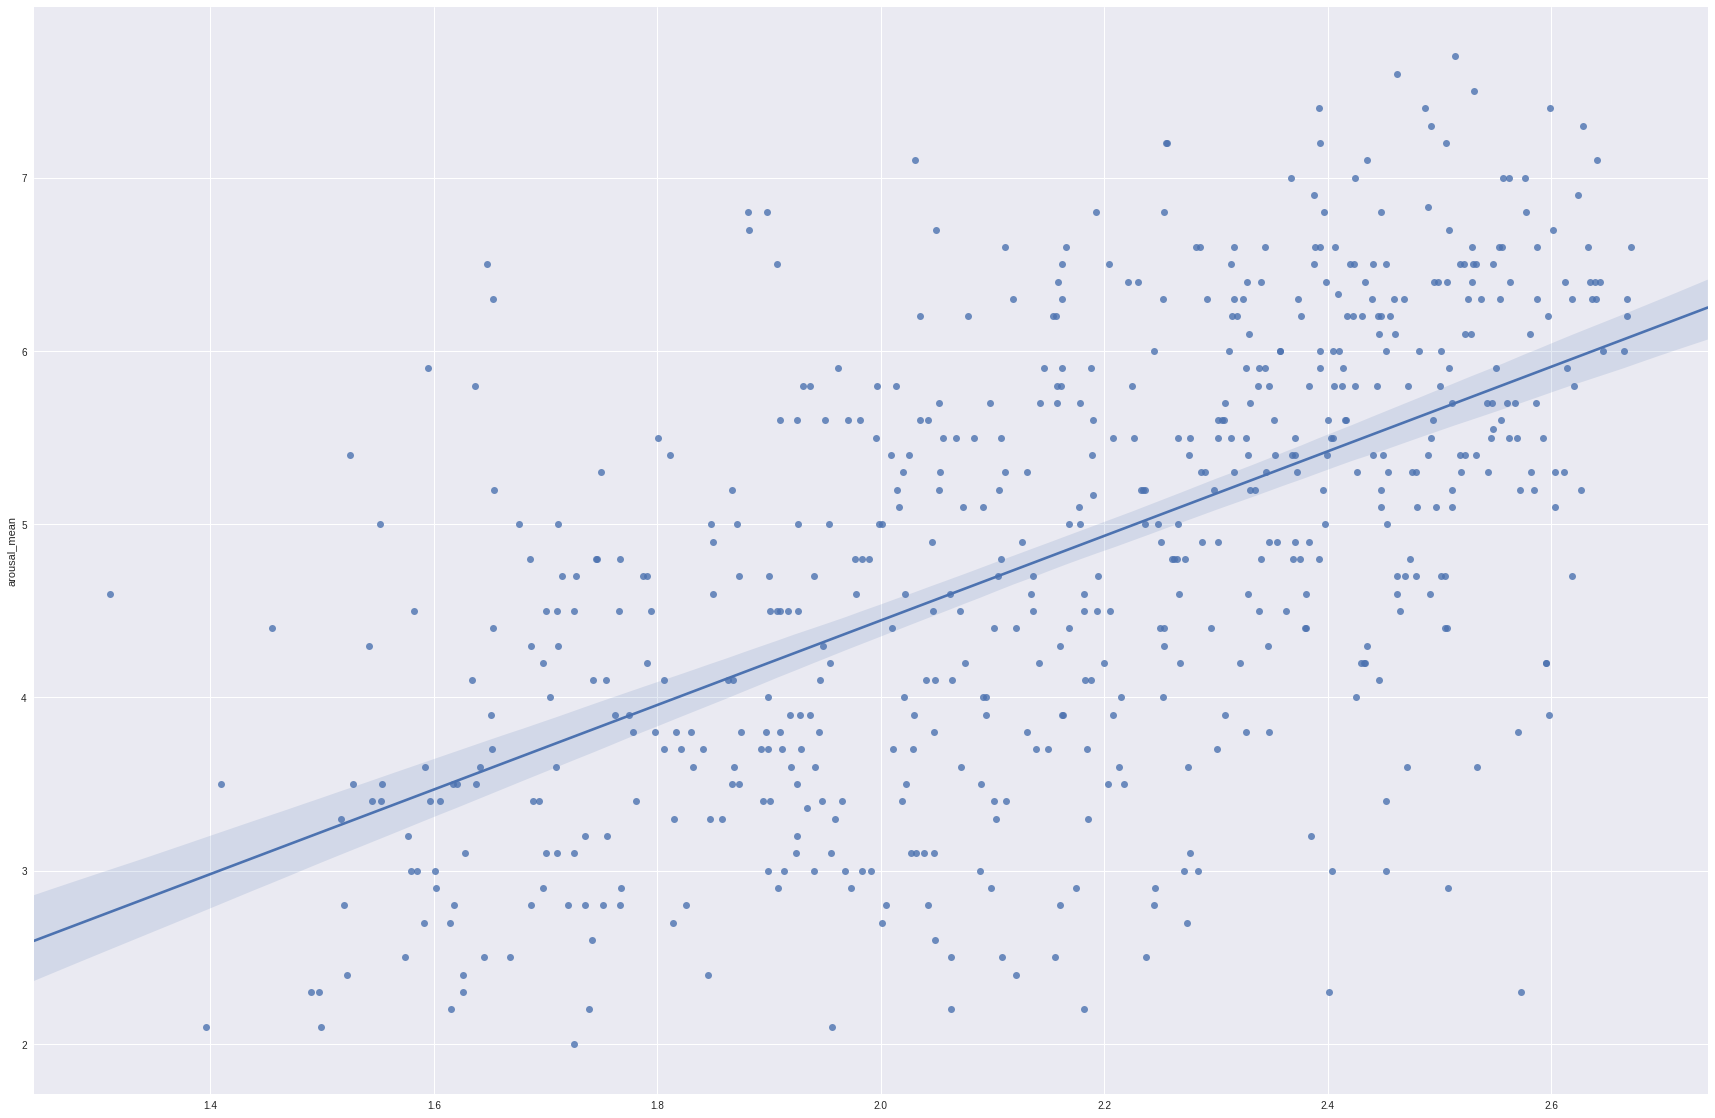

In [54]:
create_model(clf_finetune, data.as_matrix(), y['arousal_mean'])

In [55]:
y_pred_finetune = clf_finetune.predict(data.as_matrix())

In [56]:
dfPredValenceFinetune=pd.DataFrame(y_pred_finetune, columns=['valence_mean_predicted'])

In [50]:
import pickle

In [51]:
pickle.dump(dfPredValenceFinetune, open('./dfPredValenceFinetune', 'wb'))

In [57]:
dfPredValenceFinetune.to_csv('./y_pred_arousal_finetune.csv')

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7f0150423940>>
Traceback (most recent call last):
  File "/home/hminle/miniconda2/envs/pydata35/lib/python3.5/site-packages/xgboost/core.py", line 324, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'


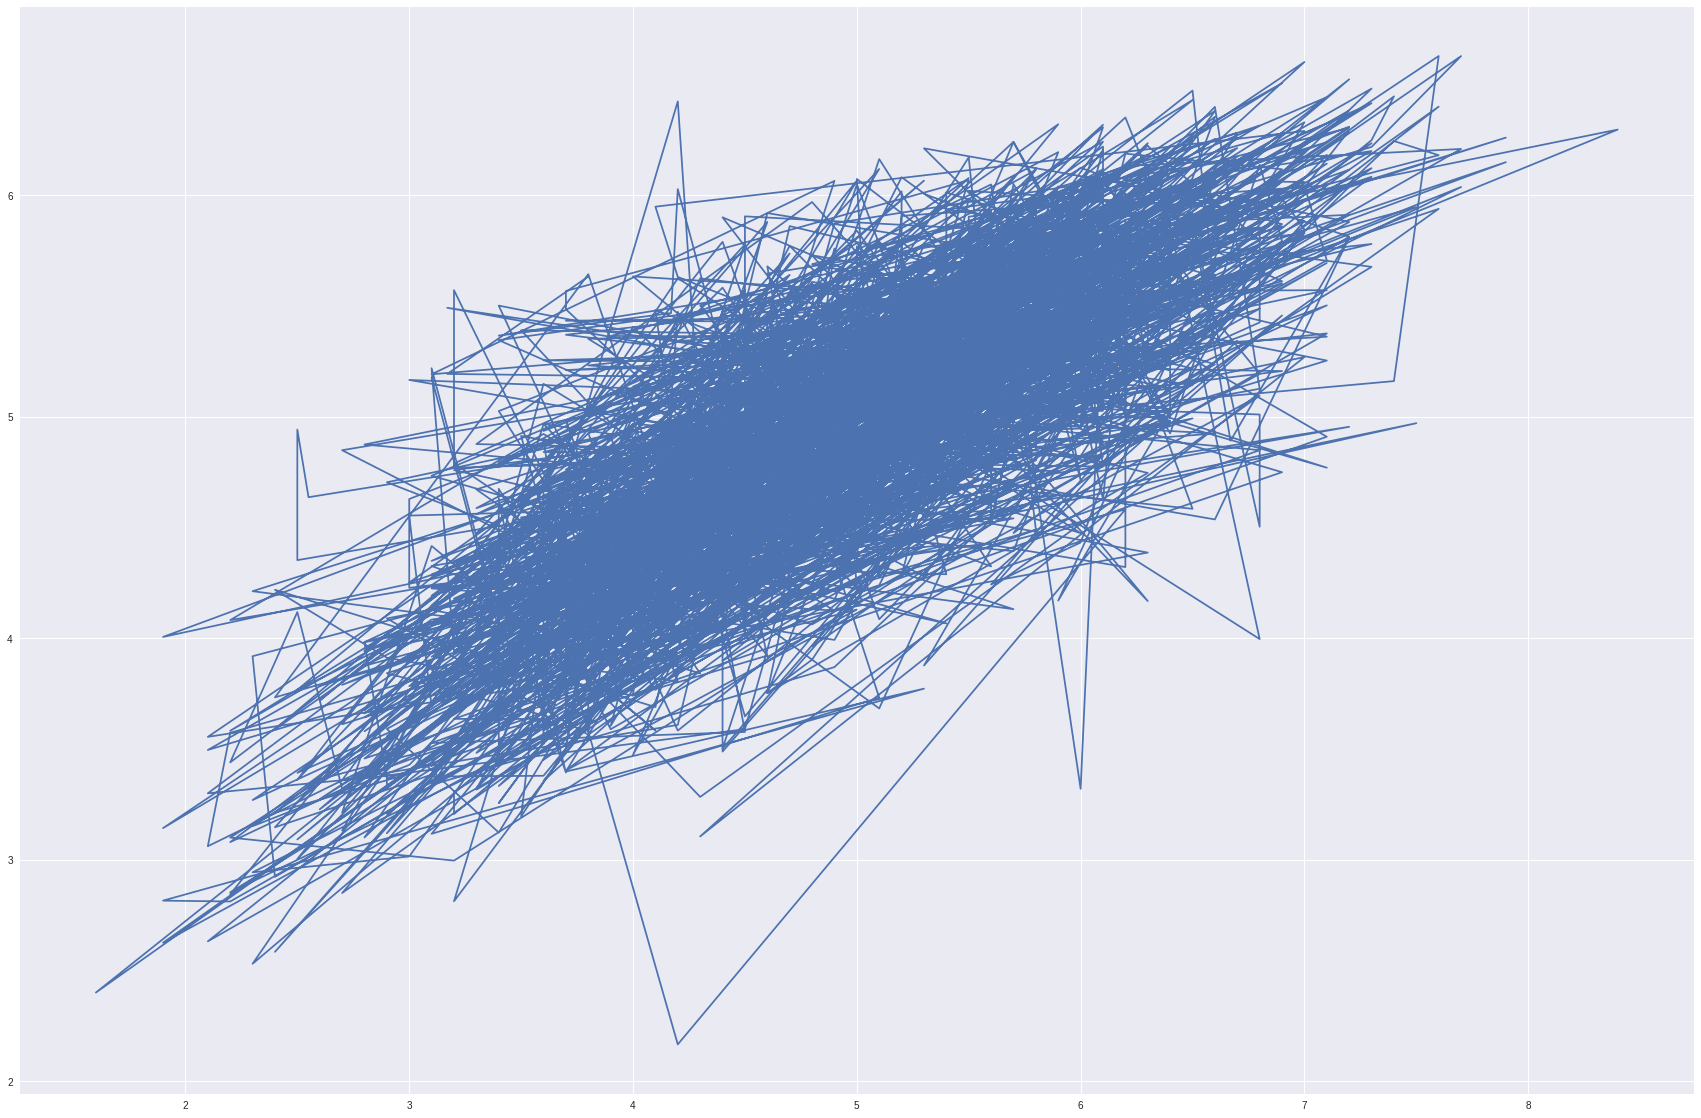

In [39]:
plt.plot(y['valence_mean'], y_pred_finetune)

In [ ]:
mean_squared_error(y_test['valence_mean'], y_pred_finetune)

In [ ]:
from hpsklearn import HyperoptEstimator

In [ ]:
from hyperopt import hp

In [ ]:
from hpsklearn import any_regressor

In [ ]:
def run_experiments(
        experimental_run,
        dataset,
        model_class=XGBR,
        loss=LOG_LOSS,
        test_metric=accuracy_score,
        random_state=None,
        dataset_name=None):
    """
    Basic experimental framework.
    Parameters
    ----------
    experimental_run : list of tuples
        These tuples should have exactly three members: the first one
        of `grid_search`, `randomized_search`, `hyperopt_search`,
        `skopt_gp_minimize`, `skopt_forest_minimize`, or
        `skopt_forest_gbrt`, the second an appropriate `param_grid`
        dict for that function, and the third a dict specifying
        keyword arguments to the search function.
    dataset : (np.array, iterable)
        A dataset (X, y) where `X` has dimension
        `(n_samples, n_features)` and `y` has
         dimension `n_samples`.
    
    model_class : classifier
        A classifier model in the mode of `sklearn`, with at least
        `fit` and `predict` methods operating on things like
        `X` and `y`.
    loss : function or string
        An appropriate loss function or string recognizable by
        `sklearn.cross_validation.cross_val_score`. In `sklearn`, scores
        are positive and losses are negative because they maximize,
        but here we are minimizing so we always want smaller to mean
        better.
    test_metric : function
        An `sklearn.metrics` function.
    random_state : int
    dataset_name : str or None
        Informal name to give the dataset. Purely for
        book-keeping.
    Returns
    -------
    list of dict
       Each dict is a results dictionary of the sort returned
       by `assess`.
    """                    
    X, y = dataset    
    skf = get_cross_validation_indices(
        X, y, random_state=random_state)        
    all_results = []
    # This loop can easily be parallelized, but doing so can
    # be tricky on some systems, since `cross_val_score`
    # calls `joblib` even if `n_jobs=1`, resulting in
    # nested parallel jobs even if there is no actual
    # parallelization elsewhere in the experimental run.
    for search_func, param_grid, kwargs in experimental_run:
        print(search_func.__name__)
        all_results.append(
            assess(
                X, y,                
                search_func=search_func, 
                model_class=XGBClassifier, 
                param_grid=param_grid,
                xval_indices=skf,
                loss=loss,
                test_metric=test_metric,                
                dataset_name=dataset_name,
                search_func_args=kwargs))
    return all_results


In [9]:
a = np.array([1,2,3])

In [5]:
a.var

<function ndarray.var>

In [12]:
a.itemset()

ValueError: itemset must have at least one argument